Grupa 5 Bartłomiej Strzelczyk, Mikołaj Golowski, Jakub Ludera 

In [1]:
%pip install sympy numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


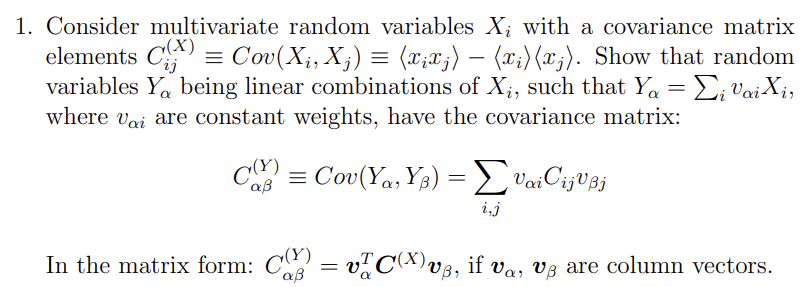

In [2]:
import numpy as np

def compute_covariance_Y(v, C_X):
    return v.T @ C_X @ v

C_X = np.array([[1.0, 0.5, 0.2],
                [0.5, 1.0, 0.3],
                [0.2, 0.3, 1.0]])

v = np.array([[1.0, 0.5],
              [0.5, 1.0],
              [0.2, 0.3]])

C_Y = compute_covariance_Y(v, C_X)

print("Covariance matrix C(Y):")
print(C_Y)


Covariance matrix C(Y):
[[1.93 1.87]
 [1.87 2.08]]


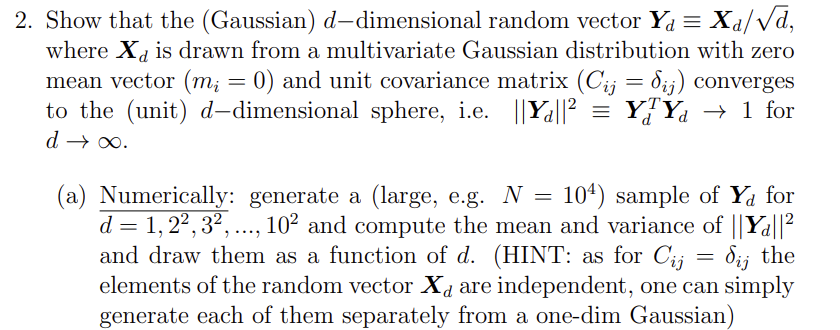

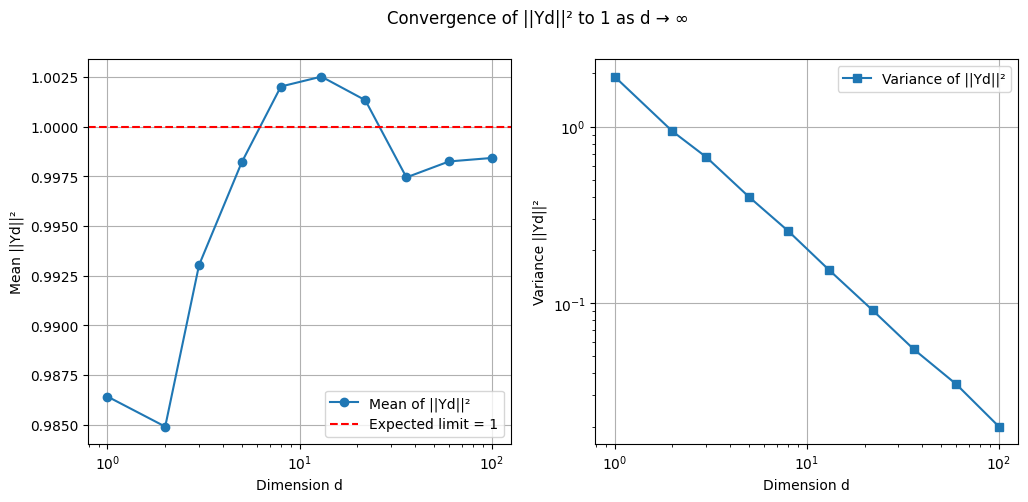

In [3]:
import matplotlib.pyplot as plt

N = 10**4 
dims = np.round(np.logspace(0, 2, 10)).astype(int)

mean_norms = []
var_norms = []

for d in dims:
    Xd = np.random.randn(N, d) 
    Yd = Xd / np.sqrt(d) 
    norms_squared = np.sum(Yd**2, axis=1) 
    
    mean_norms.append(np.mean(norms_squared)) 
    var_norms.append(np.var(norms_squared)) 

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(dims, mean_norms, marker='o', label="Mean of ||Yd||²")
plt.axhline(y=1, color='r', linestyle='--', label="Expected limit = 1")
plt.xlabel("Dimension d")
plt.ylabel("Mean ||Yd||²")
plt.xscale("log")
plt.legend()
plt.grid()


plt.subplot(1, 2, 2)
plt.plot(dims, var_norms, marker='s', label="Variance of ||Yd||²")
plt.xlabel("Dimension d")
plt.ylabel("Variance ||Yd||²")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid()

plt.suptitle("Convergence of ||Yd||² to 1 as d → ∞")
plt.show()


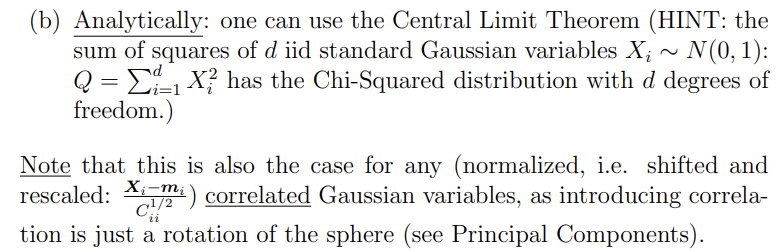

Odpowiedź w zdjęciu 2.2.jpg

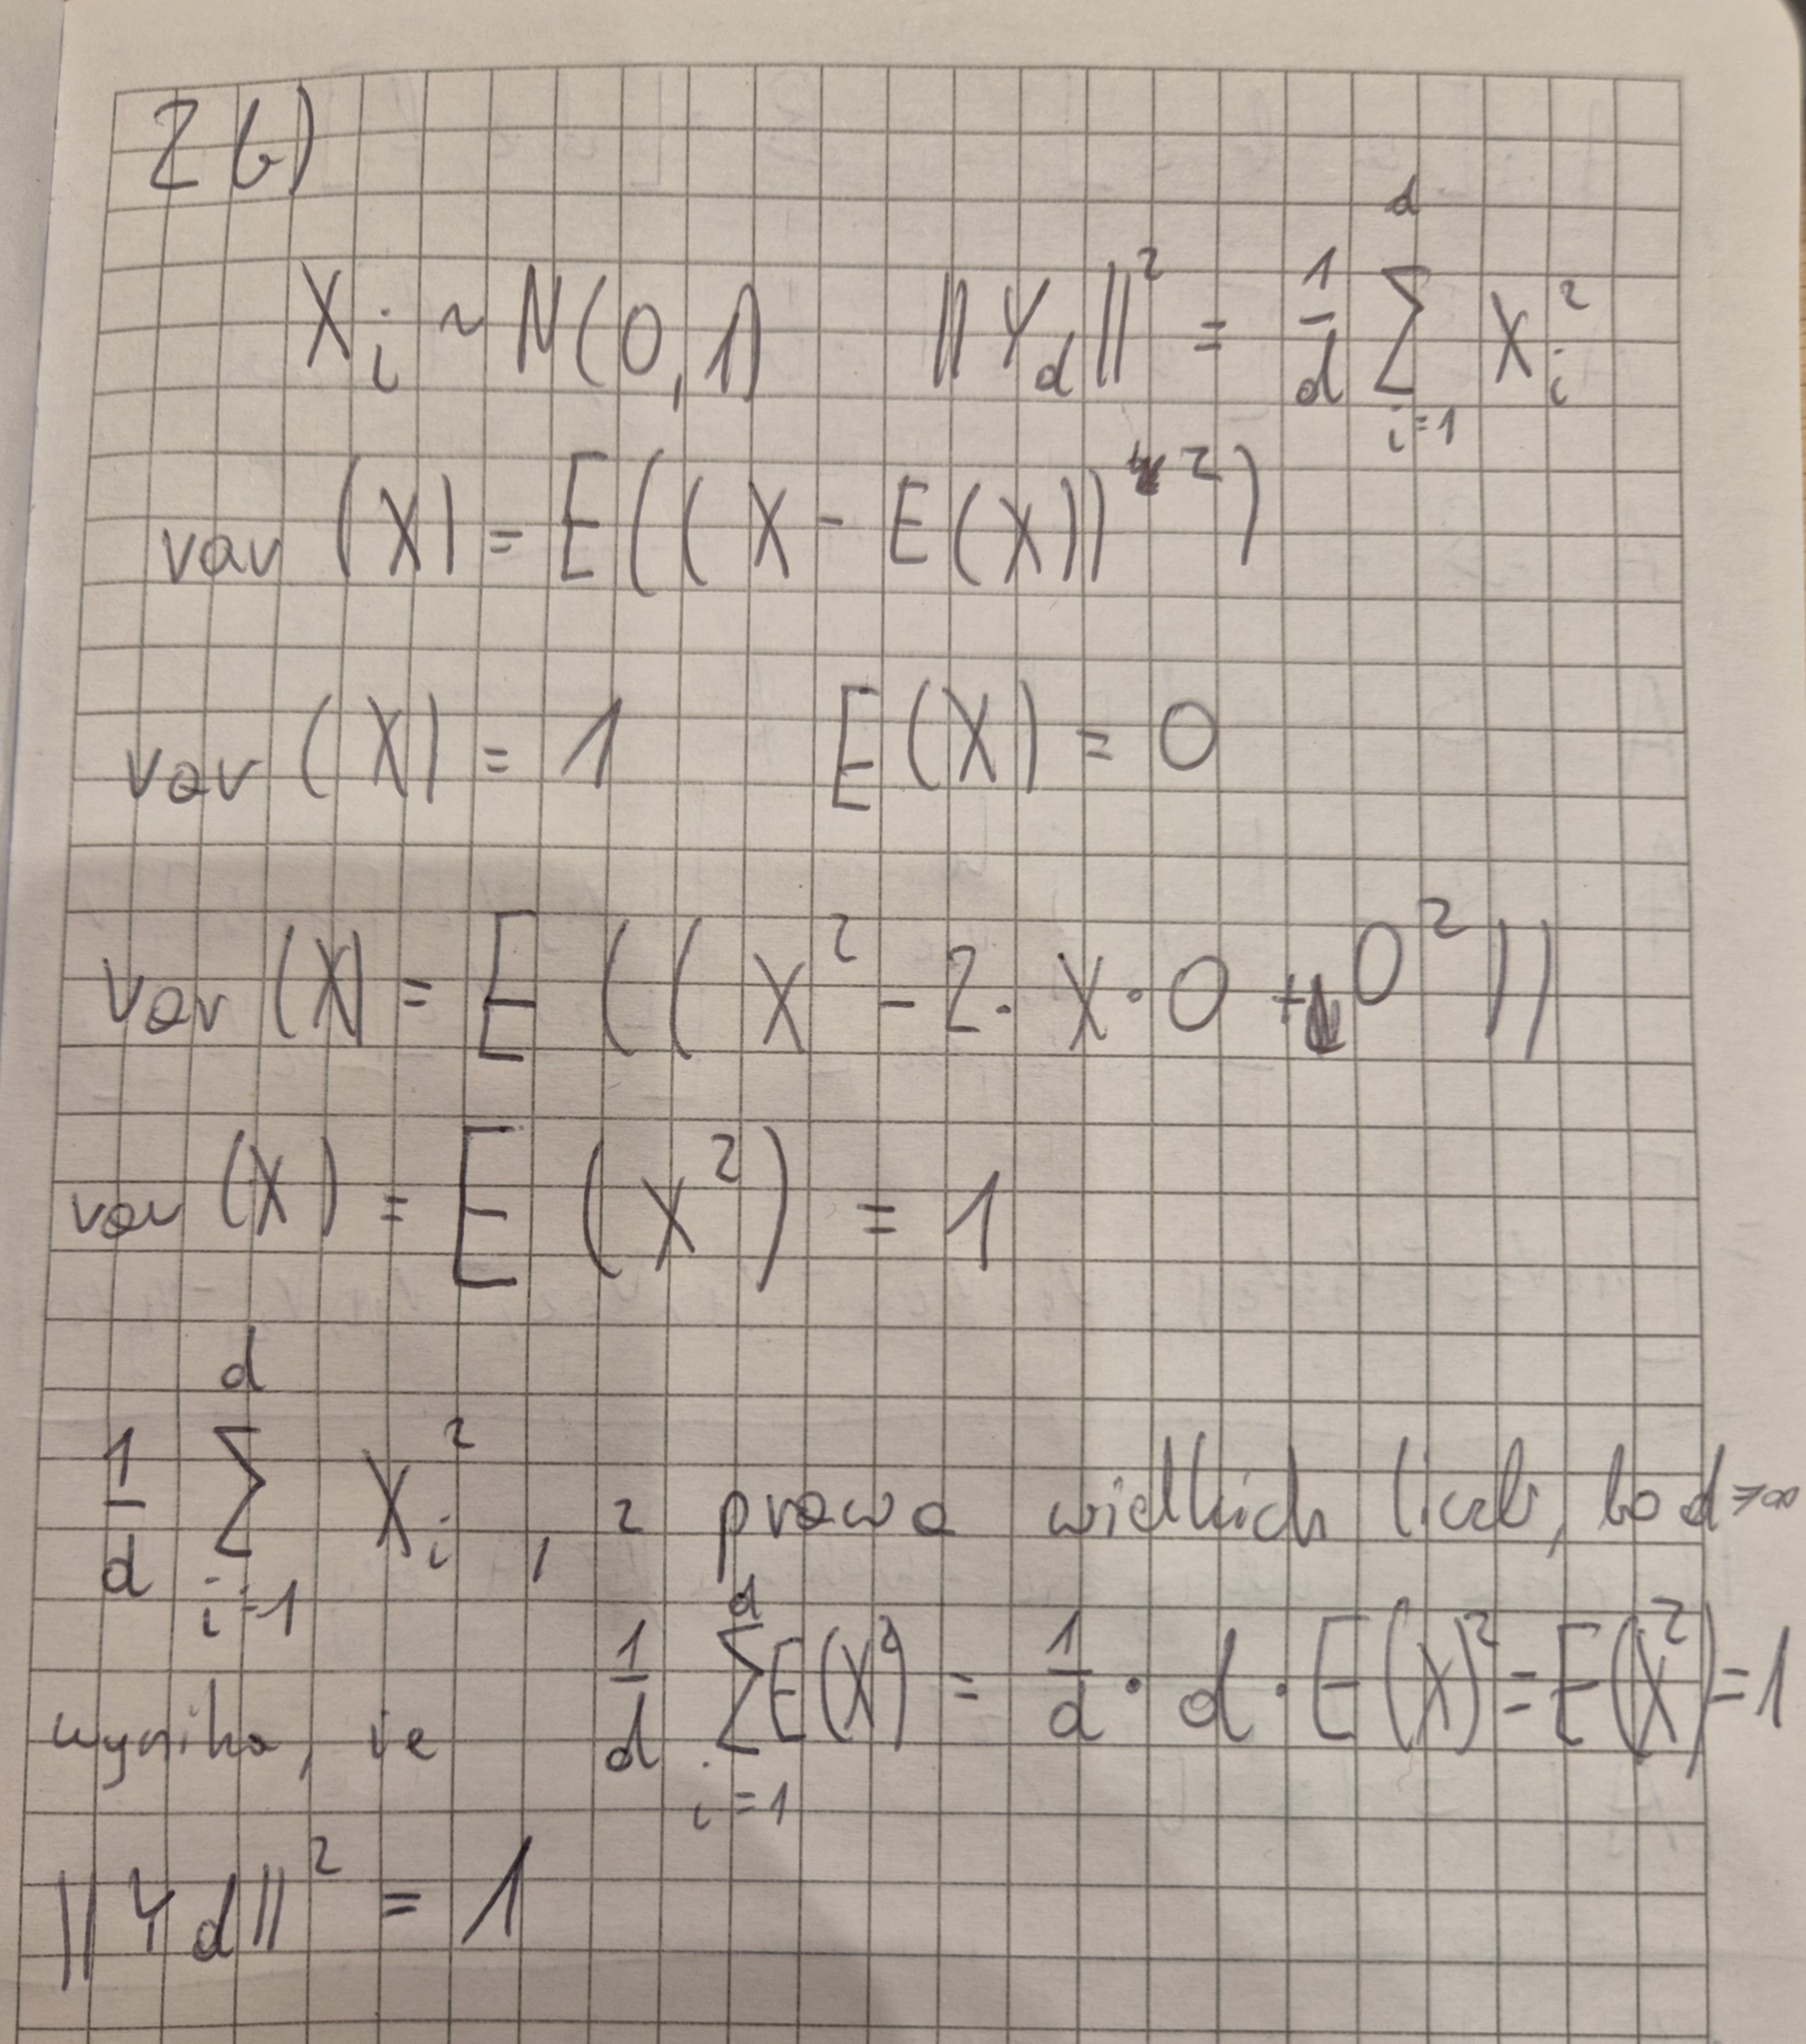

In [4]:
from IPython.display import Image, display

display(Image(filename='2.2b.jpg'))

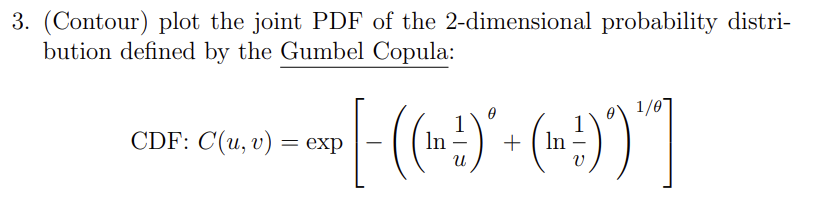

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in true_divide
  return (-log(u))**1.0*(-log(v))**1.0*exp(-((-log(u))**1.0 + (-log(v))**1.0)**1.0)/(u*v*log(u)*log(v))


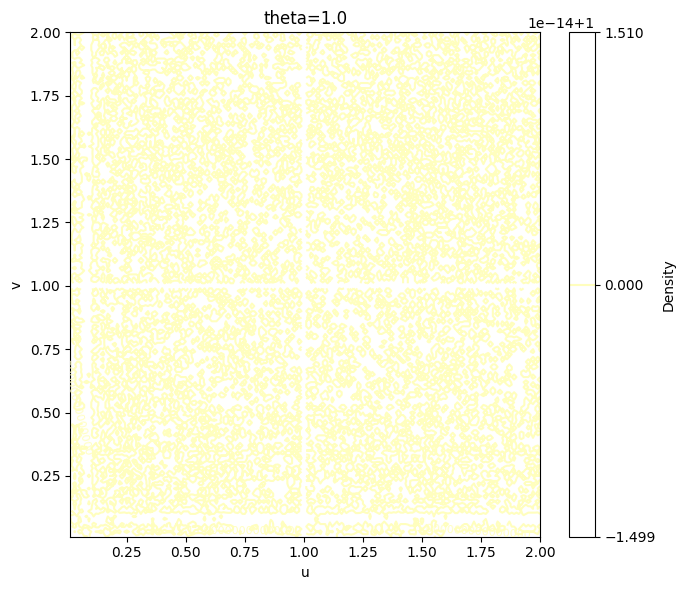

<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in power
  return 0.5*(-log(u))**1.5*(-log(v))**1.5*((-log(u))**1.5 + (-log(v))**1.5)**(-1.33333333333333)*exp(-((-log(u))**1.5 + (-log(v))**1.5)**0.666666666666667)/(u*v*log(u)*log(v)) + (-log(u))**1.5*(-log(v))**1.5*((-log(u))**1.5 + (-log(v))**1.5)**(-0.666666666666667)*exp(-((-log(u))**1.5 + (-log(v))**1.5)**0.666666666666667)/(u*v*log(u)*log(v))
<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in power
  return 0.5*(-log(u))**1.5*(-log(v))**1.5*((-log(u))**1.5 + (-log(v))**1.5)**(-1.33333333333333)*exp(-((-log(u))**1.5 + (-log(v))**1.5)**0.666666666666667)/(u*v*log(u)*log(v)) + (-log(u))**1.5*(-log(v))**1.5*((-log(u))**1.5 + (-log(v))**1.5)**(-0.666666666666667)*exp(-((-log(u))**1.5 + (-log(v))**1.5)**0.666666666666667)/(u*v*log(u)*log(v))
<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in multiply
  return 0.5*(-log(u))**1.5*(-log(v))**1.5*((-log(u))**1.5 + (-log(v))**1.5)**(-

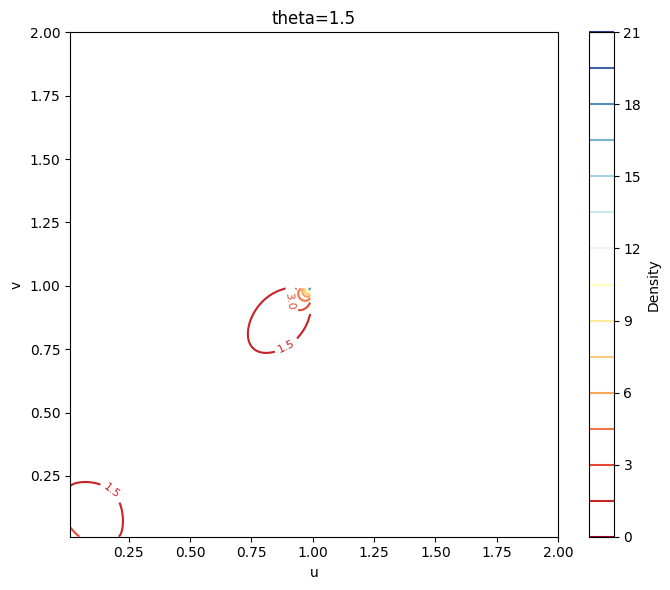

<lambdifygenerated-3>:2: RuntimeWarning: divide by zero encountered in power
  return 1.0*(-log(u))**2.0*(-log(v))**2.0*((-log(u))**2.0 + (-log(v))**2.0)**(-1.5)*exp(-((-log(u))**2.0 + (-log(v))**2.0)**0.5)/(u*v*log(u)*log(v)) + (-log(u))**2.0*(-log(v))**2.0*((-log(u))**2.0 + (-log(v))**2.0)**(-1.0)*exp(-((-log(u))**2.0 + (-log(v))**2.0)**0.5)/(u*v*log(u)*log(v))
<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in multiply
  return 1.0*(-log(u))**2.0*(-log(v))**2.0*((-log(u))**2.0 + (-log(v))**2.0)**(-1.5)*exp(-((-log(u))**2.0 + (-log(v))**2.0)**0.5)/(u*v*log(u)*log(v)) + (-log(u))**2.0*(-log(v))**2.0*((-log(u))**2.0 + (-log(v))**2.0)**(-1.0)*exp(-((-log(u))**2.0 + (-log(v))**2.0)**0.5)/(u*v*log(u)*log(v))
<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in true_divide
  return 1.0*(-log(u))**2.0*(-log(v))**2.0*((-log(u))**2.0 + (-log(v))**2.0)**(-1.5)*exp(-((-log(u))**2.0 + (-log(v))**2.0)**0.5)/(u*v*log(u)*log(v)) + (-log(u))**2.0*(-log(v))**2.0*((

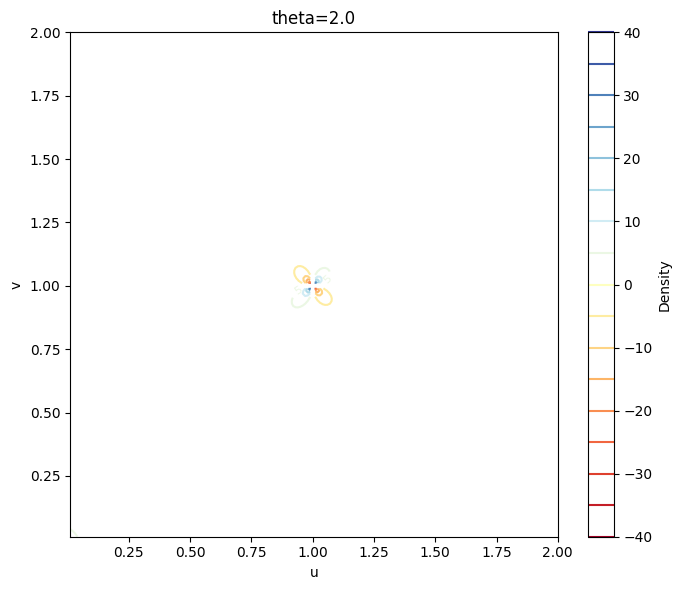

In [5]:
import sympy

thetas = [1.0, 1.5, 2.0]
for theta_value in thetas:
    u, v = sympy.symbols('u v', positive=True)  
    theta = sympy.Symbol('theta', positive=True)

    A = (-sympy.log(u))**theta
    B = (-sympy.log(v))**theta

    C = sympy.exp(- (A + B)**(1/theta))

    dC_du = sympy.diff(C, u)    
    pdf_sym = sympy.diff(dC_du, v)
    pdf_func = sympy.lambdify((u, v), pdf_sym.subs(theta, theta_value), 'numpy')

    N = 200
    u_vals = np.linspace(0.01, 2, N)
    v_vals = np.linspace(0.01, 2, N)


    U, V = np.meshgrid(u_vals, v_vals)
    PDF = pdf_func(U, V)

    plt.figure(figsize=(7,6))
    cs = plt.contour(U, V, PDF, levels=15, cmap='RdYlBu')
    plt.clabel(cs, inline=True, fontsize=8)
    plt.title(f"theta={theta_value}")
    plt.xlabel("u")
    plt.ylabel("v")
    plt.colorbar(cs, label="Density")
    plt.tight_layout()
    plt.show()

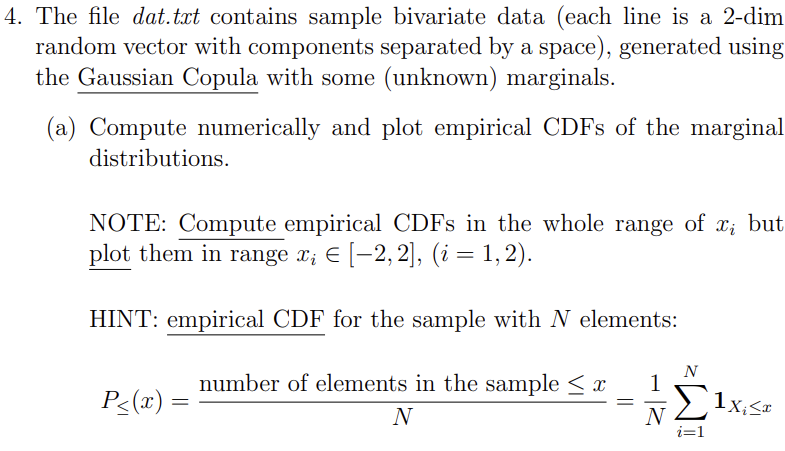

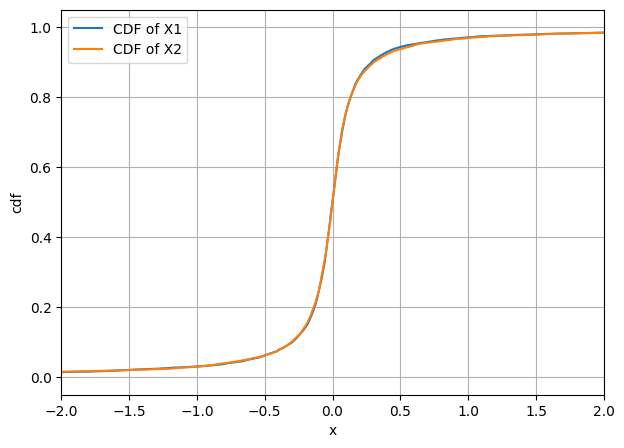

In [6]:
data = np.loadtxt('dat.txt')
x1 = data[:, 0]
x2 = data[:, 1]
N  = data.shape[0]

x1_sorted = np.sort(x1)
x2_sorted = np.sort(x2)

F1 = np.arange(1, N+1) / N
F2 = np.arange(1, N+1) / N

plt.figure(figsize=(7,5))
plt.plot(x1_sorted, F1, label='CDF of X1')
plt.plot(x2_sorted, F2, label='CDF of X2')
plt.xlabel('x')
plt.ylabel('cdf')
plt.xlim([-2, 2])
plt.legend()
plt.grid(True)
plt.show()


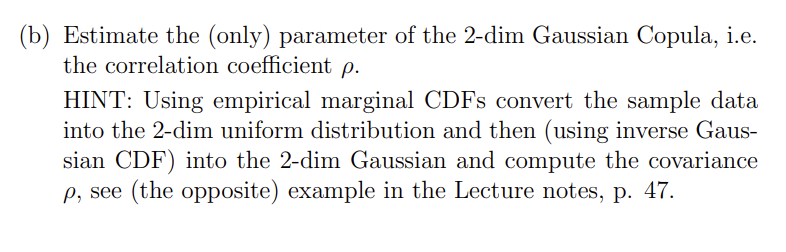

In [7]:
from scipy.stats import norm

data = np.loadtxt('dat.txt')
x1 = data[:, 0]
x2 = data[:, 1]
N  = data.shape[0]

ranks_x1 = np.argsort(np.argsort(x1))
ranks_x2 = np.argsort(np.argsort(x2))

U1 = (ranks_x1 + 1) / (N + 1.0)
U2 = (ranks_x2 + 1) / (N + 1.0)

Y1 = norm.ppf(U1)
Y2 = norm.ppf(U2)

rho_hat = np.corrcoef(Y1, Y2)[0, 1]

print("Estimated correlation:", rho_hat)


Estimated correlation: -0.5923599557128396
